In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def clean_data(df):
    # Drop duplicated rows
    df.drop_duplicates(inplace=True)
    
    # Fill NaN values with column means (for numeric columns)
    numeric_columns = df.select_dtypes(include=['number']).columns
    df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())
    
    # Fill NaN values with most frequent value (for non-numeric columns)
    non_numeric_columns = df.select_dtypes(exclude=['number']).columns
    for col in non_numeric_columns:
        most_frequent_value = df[col].mode()[0]
        df[col].fillna(most_frequent_value, inplace=True)

def visualize_data(df, column_name):
    try:
        column_data = df[column_name]
        if pd.api.types.is_numeric_dtype(column_data):
            xzx = column_data.value_counts()
            
            # Bar chart
            sns.barplot(x=xzx.index,y=xzx.values)
            plt.grid(color='gray', linestyle='--', linewidth=0.5)
            plt.title(f'Bar Plot for {column_name}')
            plt.show()
            
            # Histogram
            plt.hist(column_data, bins=20, edgecolor='black', alpha=0.7)
            plt.xlabel(column_name)
            plt.ylabel('Frequency')
            plt.title(f'Histogram for {column_name}')
            plt.grid(color='gray', linestyle='--', linewidth=0.5)
            plt.show()

            # Pie chart
            plt.pie(xzx, labels=xzx.index, autopct='%1.1f%%', startangle=140)
            plt.axis('equal')
            plt.title(f'Pie Chart for {column_name}')
            plt.show()

            # Scatter plot
            plt.scatter(xzx.index, xzx.values)
            plt.grid(color='orange', linestyle='--', linewidth=0.5)
            plt.title(f'Scatter Plot for {column_name}')
            plt.show()

            # Box plot
            plt.boxplot(xzx)
            plt.title(f'Box Plot for {column_name}')
            plt.show()

        
        else:
            value_counts = column_data.value_counts()

            # Bar chart
            sns.barplot(x=value_counts.index,y=value_counts.values)
            plt.grid(color='green', linestyle='--', linewidth=0.5)
            plt.title(f'Bar Plot for {column_name}')
            plt.show()

            # Pie chart
            plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            plt.axis('equal')
            plt.title(f'Pie Chart for {column_name}')
            plt.show()
    except KeyError:
        print("Column not found in the dataset.")

Enter the file path:
 insurance.csv


Data has been cleaned and processed.

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1337 rows x 7 columns]





Here is a short description for your data :

               age          bmi     children       charges
count  1337.000000  1337

C:\Users\Abd El Rahman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


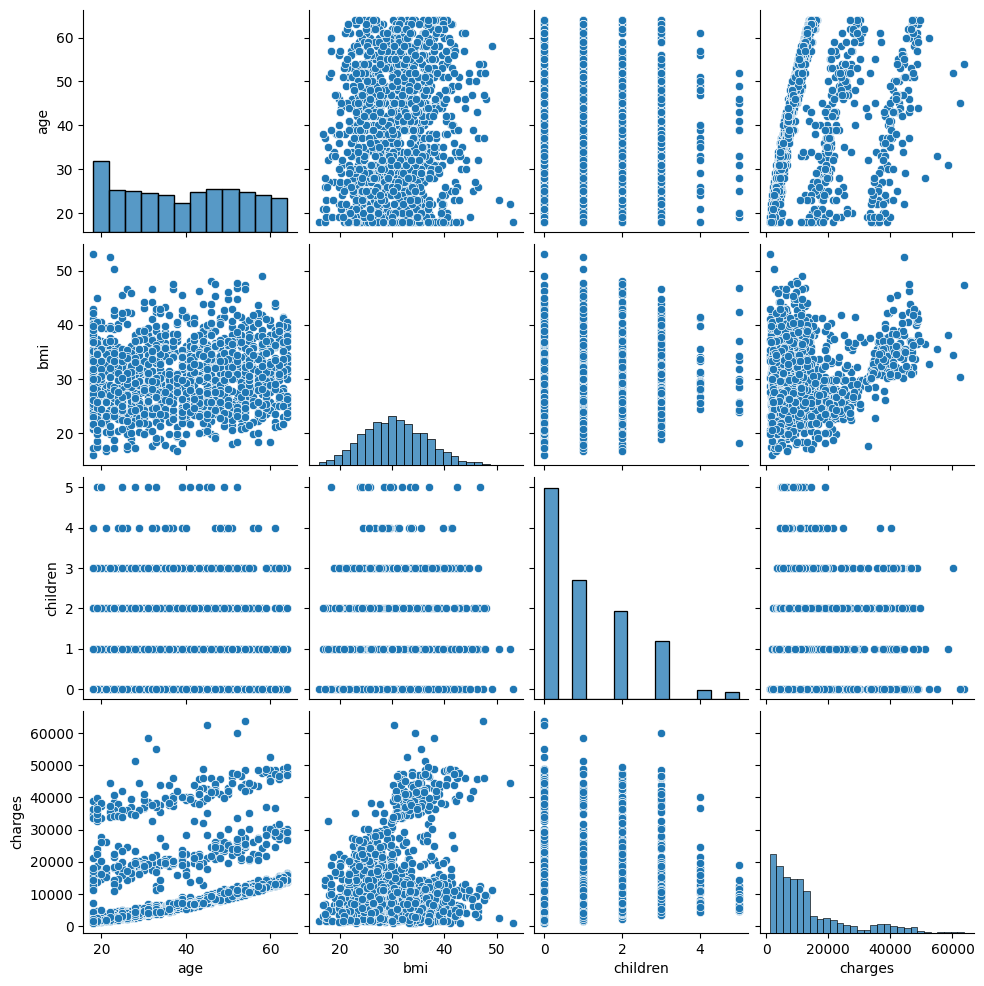

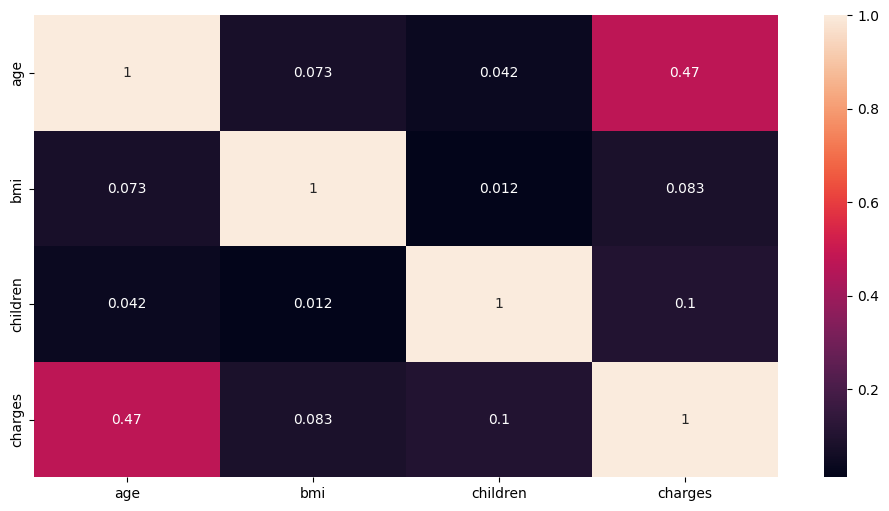

Here are the columns in the dataset:

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


Enter the column name you want to visualize:
 region


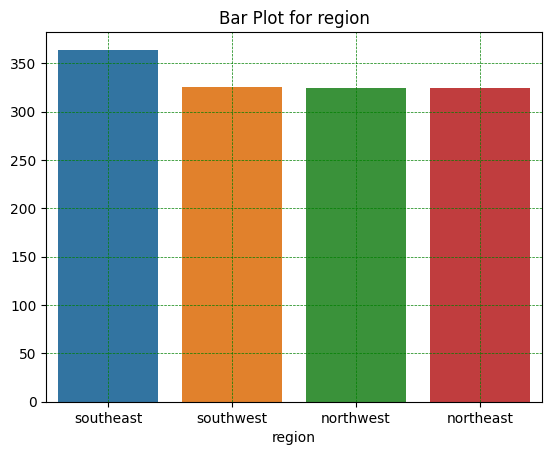

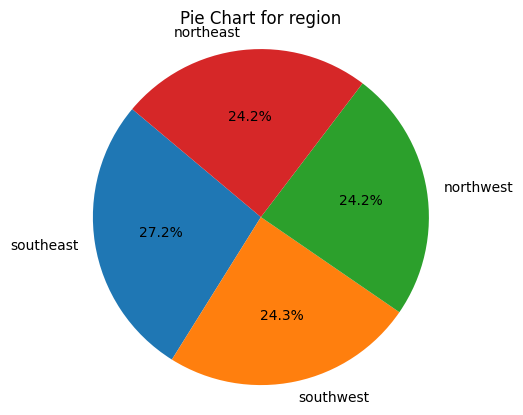

Do you want to visualize another column? (yes/no):  yes
Enter the column name you want to visualize:
 age


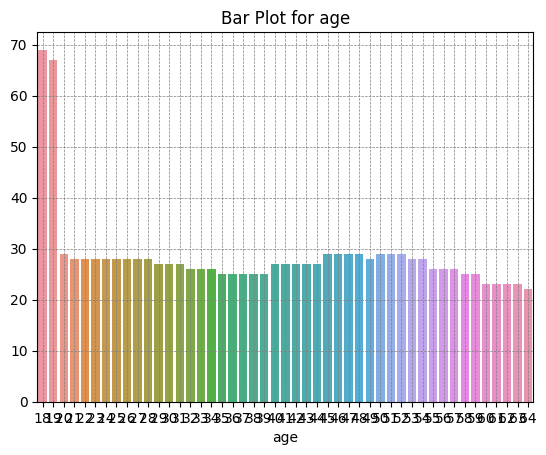

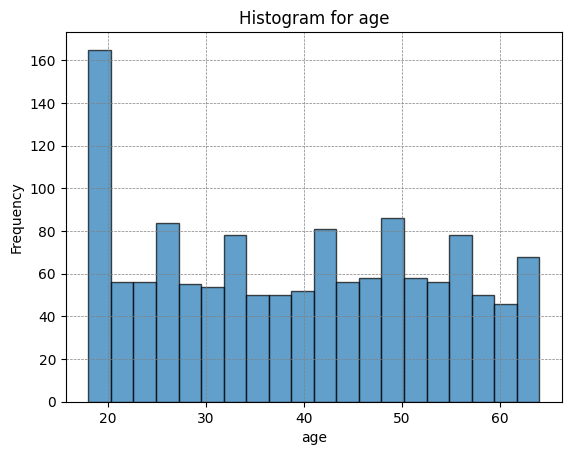

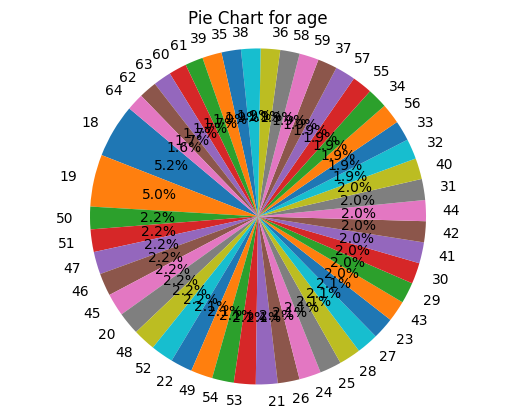

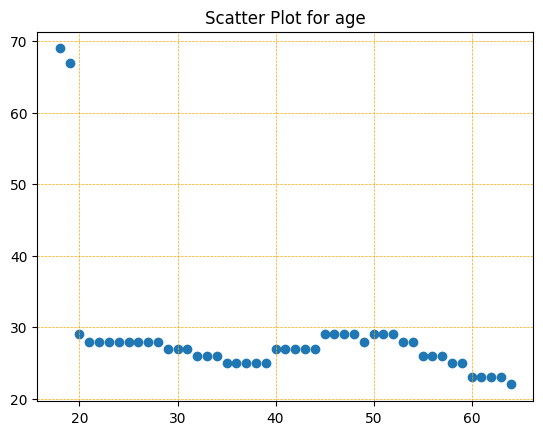

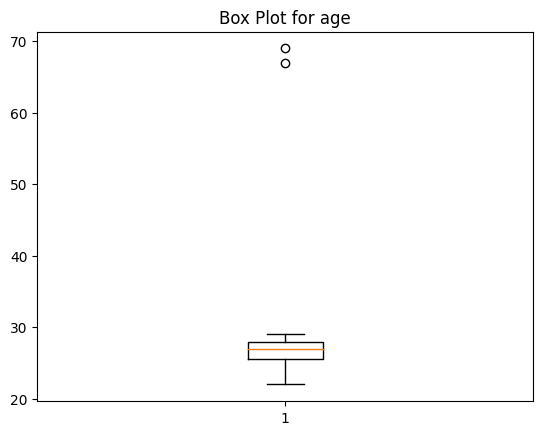

Do you want to visualize another column? (yes/no):  no


In [3]:
while True:
    file_path = input("Enter the file path:\n")
    try:
        if file_path.lower().endswith(".csv"):
            df = pd.read_csv(file_path)
            break
        elif file_path.lower().endswith(".xlsx"):
            df = pd.read_excel(file_path)
            break
        else:
            print("Unsupported file format. Please enter a .csv or .xlsx file.")
    except Exception as e:
        print("Error:", e)
        print("Can't find such a file with this name or extension.")

clean_data(df)
print("Data has been cleaned and processed.\n")
print(df)

print('\n\n\n\n')

print("Here is a short description for your data :\n")
print(df.describe())
print('\n\n\n\n')

print("Here is Some Plots for your data can help you choosing your Features:\n")
sns.pairplot(df)
plt.show()
numeric_columns = df.select_dtypes(include=['number'])
corr = numeric_columns.corr(method='kendall')
fig = plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True)
plt.show()

print("Here are the columns in the dataset:\n")
print(df.columns)

while True:
    column_to_visualize = input("Enter the column name you want to visualize:\n")
    visualize_data(df, column_to_visualize) 
    
    continue_or_not = input("Do you want to visualize another column? (yes/no): ")
    if continue_or_not.lower() != 'yes':
        break

Do you want to perform machine learning? (yes/no):  yes


Available Columns Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


Enter the name of the output column:  charges


C:\Users\Abd El Rahman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


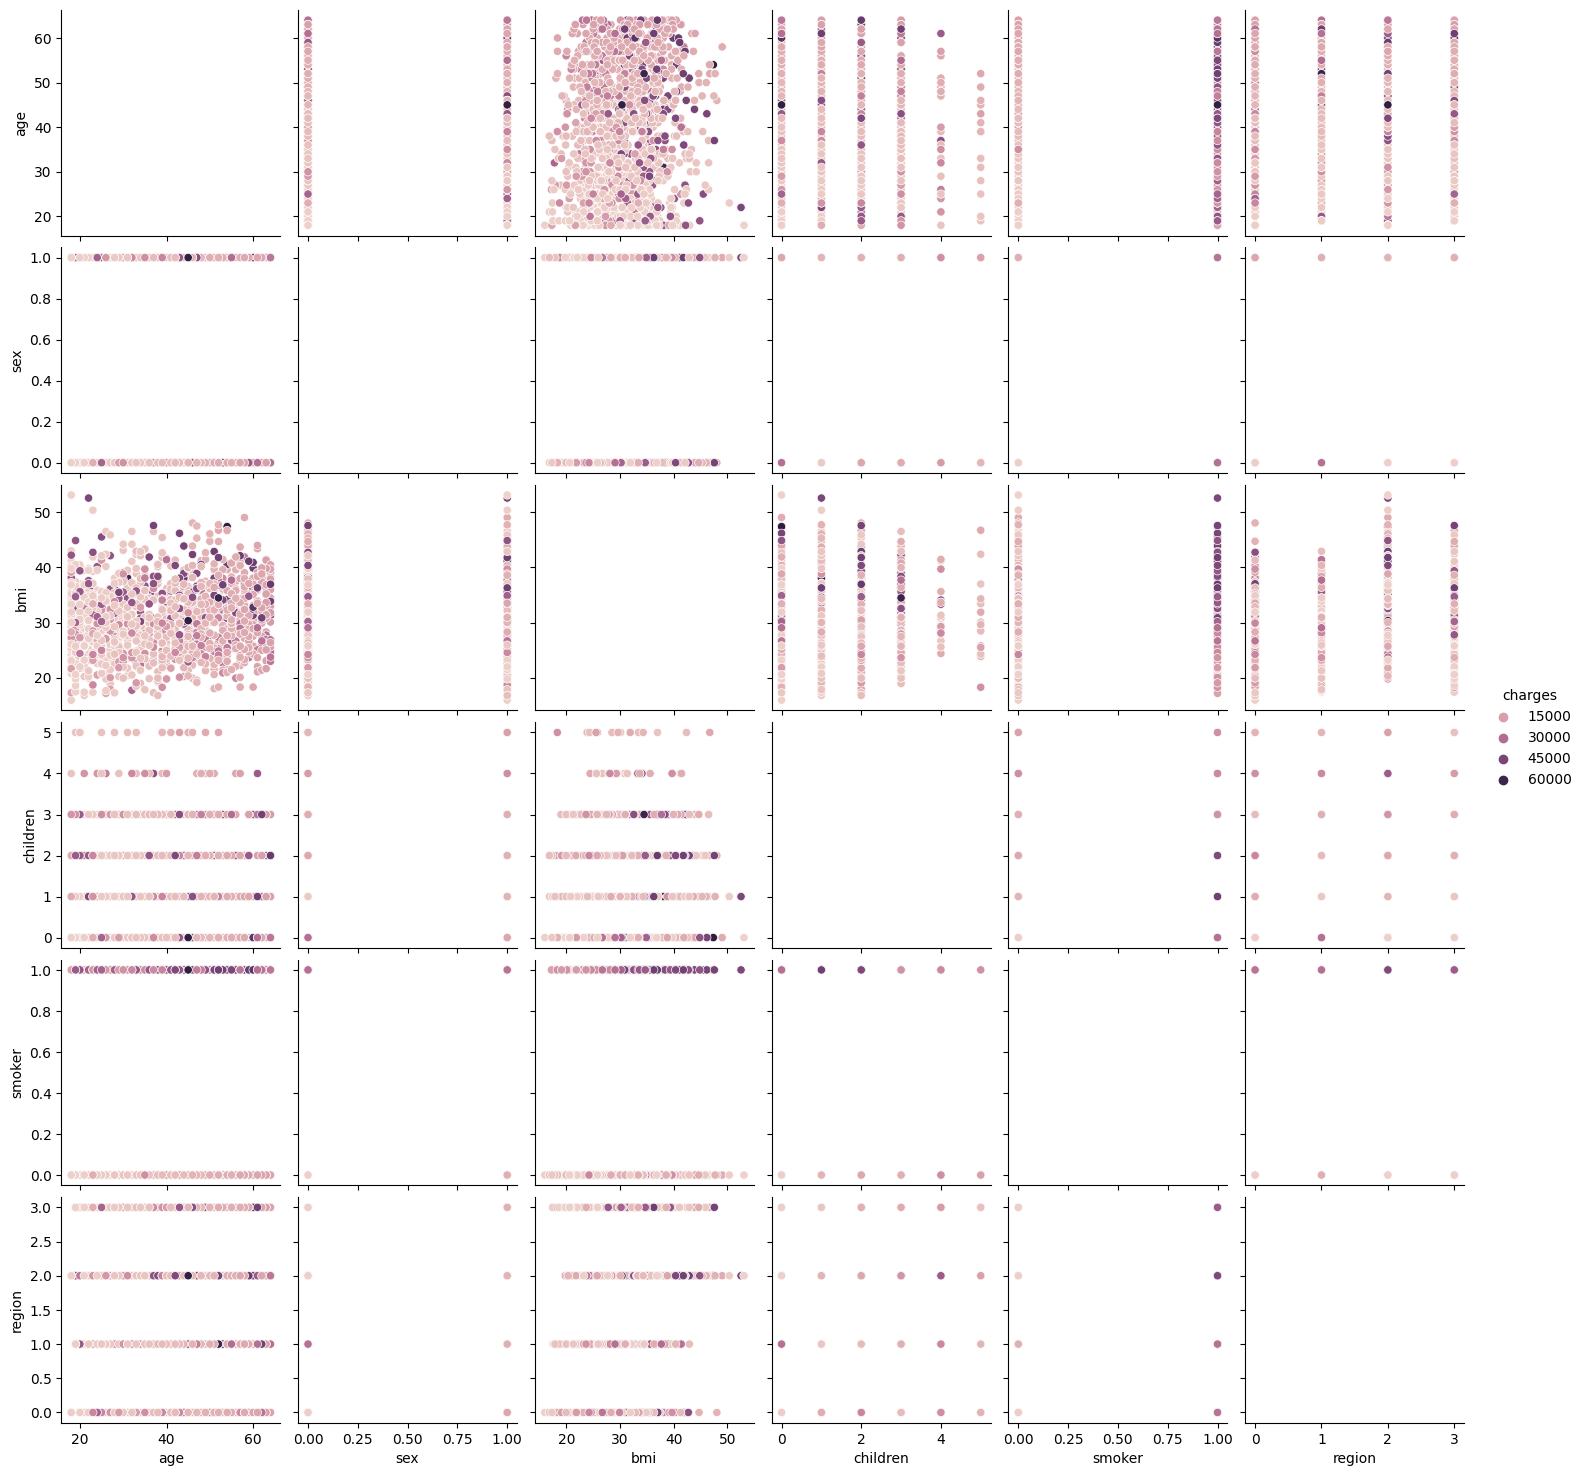

Do you want to specify the input features (X)? (yes/no):  yes


Available features:
0: age
1: sex
2: bmi
3: children
4: smoker
5: region


Enter the column numbers of the selected features (comma-separated):  0,1,2
Do you want to perform feature scaling? (yes/no):  yes
Choose a scaling method (MinMaxScaler/StandardScaler):  StandardScaler


This is a regression task.
Suggested algorithms: Linear Regression,Lasso Regression,Ridge Regression,Polynomial Regression, SVR


Choose a machine learning algorithm from the suggestions:  SVR
Do you want to change Parameters? (yes/no): yes
what is the C? default=’1’ 0.968
what is the kernel?{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’ rbf
what is the gamma? {‘scale’, ‘auto’} or float, default=’scale’ scale


     Model Evaluation Metrics  


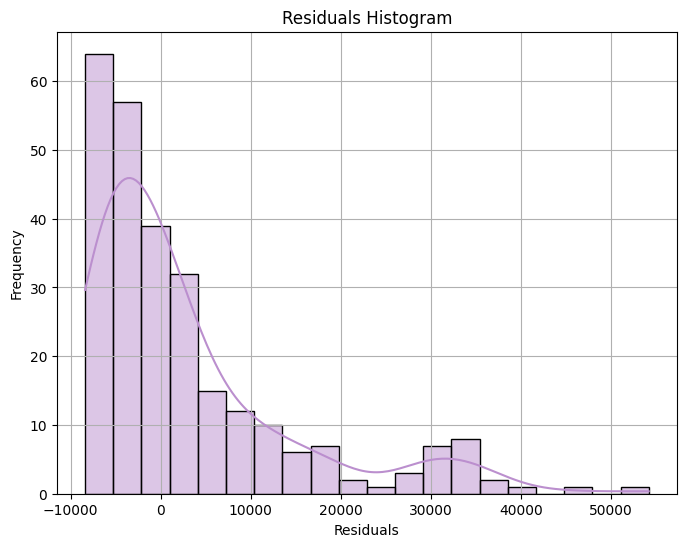

R-squared: -0.055365207401176564
Mean Squared Error: 144858660.15824756
Mean Absolute Error= 7883.462495189864
     Model Parameters & Score   
Model Intercept= [9579.13040131]


Do you want to try another model? (yes/no):  yes
Do you want to specify the input features (X)? (yes/no):  no
Do you want to perform feature scaling? (yes/no):  no


This is a regression task.
Suggested algorithms: Linear Regression,Lasso Regression,Ridge Regression,Polynomial Regression, SVR


Choose a machine learning algorithm from the suggestions:  Polynomial Regression
Enter the degree of the polynomial (e.g., 2 for quadratic):  4


     Model Evaluation Metrics  


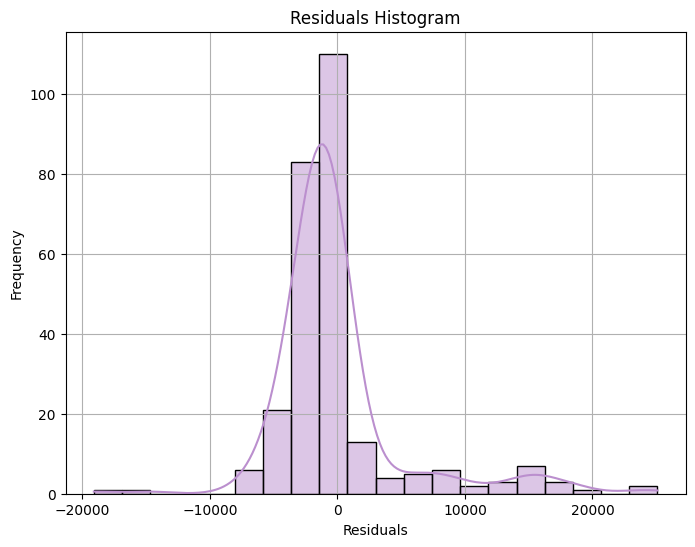

C:\Users\Abd El Rahman\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


R-squared: 0.800045577547494
Mean Squared Error: 27445598.4772442
Mean Absolute Error= 3082.157941590767
     Model Parameters & Score   
Model Intercept= 8673262658.975723
Model Coef= [-8.67327459e+09  6.40549361e+03  6.73732053e+03 -6.57668608e+03
 -2.63556379e+03  4.95141810e+04  1.36951430e+04 -1.16536469e+02
 -5.65244702e+02 -2.93987041e+02 -7.33352445e+02 -7.22198960e+02
 -5.50549109e+01  6.73732054e+03 -9.53049747e+01  2.46297210e+03
 -2.82368807e+03 -4.68273249e+03  4.86368706e+02  1.33129714e+03
 -6.07351614e+03 -8.63602313e+02  1.77844622e+03 -4.45488371e+03
 -7.17496437e+03  4.95141810e+04  2.33001350e+03  5.35154815e+03
  1.37849719e+00  1.16414989e+01  2.30848700e+00  4.99812726e+00
  4.21945918e+00 -1.15714100e+00 -5.65244697e+02  2.43522215e+01
  5.02368190e+01  1.41710307e+02  3.84844929e+01  5.71742794e+00
  2.00129327e+01  6.60895763e+01 -2.98044818e+00  4.43598428e+01
  1.93650135e+02 -4.00746534e+01 -7.22198959e+02 -9.58808078e+01
  1.08829565e+02  6.73732054e+03 -9

Do you want to try another model? (yes/no):  no


In [4]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, confusion_matrix,ConfusionMatrixDisplay, mean_squared_error,mean_absolute_error,classification_report
from sklearn.linear_model import LogisticRegression, LinearRegression,Lasso,Ridge
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

def encode_categorical_features(df):
    # Encode categorical features
    object_columns = df.select_dtypes(include=['object']).columns
    label_encoder = LabelEncoder()
    
    for col in object_columns:
        df[col] = label_encoder.fit_transform(df[col])
    
    return df

def determine_task(df, output_column):
    # Determine the task (classification or regression)
    if len(df[output_column].unique()) <= 4:
        return 'classification'
    else:
        return 'regression'

def choose_model(task):
    # Suggest machine learning algorithms based on the task
    if task == 'classification':
        print("Suggested algorithms: Logistic Regression, SVC, K-Nearest Neighbors, Decision Tree, Random Forest")
    else:
        print("Suggested algorithms: Linear Regression,Lasso Regression,Ridge Regression,Polynomial Regression, SVR")
    
    while True:
        # Ask the user to choose a model
        model_name = input("Choose a machine learning algorithm from the suggestions: ")
        if model_name.lower() in ['logistic regression', 'svc', 'k-nearest neighbors', 'decision tree',
                                  'random forest', 'linear regression','lasso regression','ridge regression','svr', 'polynomial regression']:
            return model_name
        else:
            print("Invalid model selection. Please choose a valid model.")

def train_and_evaluate_model(model_name, task, X_train, y_train, X_test, y_test):
    # Initialize and train the selected model
    if model_name.lower() == 'logistic regression' and task == 'classification':
        modify=input("Do you want to change Parameters? (yes/no):")
        if modify.lower()=='yes':
            penalty=input("what is the penalty?{‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’")
            C=float(input("what is the C? default=’1’"))
            solver=input("what is the solver?{‘lbfgs’, ‘liblinear’, ‘newton-cg’, ‘newton-cholesky’, ‘sag’, ‘saga’}, default=’lbfgs’")
            model=LogisticRegression(penalty=penalty,C=C,solver=solver)
            model.fit(X_train, y_train)
        else:
            model = LogisticRegression()
            model.fit(X_train, y_train)
    elif model_name.lower() == 'svc' and task == 'classification':
        modify=input("Do you want to change Parameters? (yes/no):")
        if modify.lower()=='yes':
            C=float(input("what is the C? default=’1’"))
            kernel=input("what is the kernel?{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’")
            gamma=input('what is the gamma? {‘scale’, ‘auto’} or float, default=’scale’')
            if kernel == 'poly':
                degree=int(input('Enter the degree of the polynomial (e.g., 2 for quadratic):'))
                model = SVC(C=C,kernel=kernel,gamma=gamma,degree=degree)
                model.fit(X_train, y_train)
            else:
                model = SVC(C=C,kernel=kernel,gamma=gamma)
                model.fit(X_train, y_train)
        else:
            model = SVC()
            model.fit(X_train, y_train)
    elif model_name.lower() == 'k-nearest neighbors' and task == 'classification':
        modify=input("Do you want to change Parameters? (yes/no):")
        if modify.lower()=='yes':
            n_neighbors=int(input("what is the n_neighbors? default=’5’"))
            algorithm=input("what is the algorithm? {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’")
            model = KNeighborsClassifier(n_neighbors=n_neighbors,algorithm=algorithm)
            model.fit(X_train, y_train)
        else:            
            model = KNeighborsClassifier()
            model.fit(X_train, y_train)
    elif model_name.lower() == 'decision tree' and task == 'classification':
        modify=input("Do you want to change Parameters? (yes/no):")
        if modify.lower()=='yes':
            criterion=input("what is the criterion? {“gini”, “entropy”, “log_loss”}, default=”gini”")
            splitter=input("what is the splitter? {“best”, “random”}, default=”best”")
            max_depth=int(input("what is the max_depth? int, default=None"))
            model = DecisionTreeClassifier(criterion=criterion,splitter=splitter,max_depth=max_depth)
            model.fit(X_train, y_train)
        else:        
            model = DecisionTreeClassifier()
            model.fit(X_train, y_train)
    elif model_name.lower() == 'random forest' and task == 'classification':
        modify=input("Do you want to change Parameters? (yes/no):")
        if modify.lower()=='yes':
            n_estimators=int(input("what is the n_estimators? int, default=100"))
            criterion=input("what is the criterion? {“gini”, “entropy”, “log_loss”}, default=”gini”")
            max_depth=int(input("what is the max_depth? int, default=None"))
            model = RandomForestClassifier(n_estimators=n_estimators,criterion=criterion,max_depth=max_depth)
            model.fit(X_train, y_train)
        else:   
            model = RandomForestClassifier()
            model.fit(X_train, y_train)
    elif model_name.lower() == 'linear regression' and task == 'regression':
        model = LinearRegression()
        model.fit(X_train, y_train)
    elif model_name.lower() == 'svr' and task == 'regression':
        modify=input("Do you want to change Parameters? (yes/no):")
        if modify.lower()=='yes':
            C=float(input("what is the C? default=’1’"))
            kernel=input("what is the kernel?{‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’} or callable, default=’rbf’")
            gamma=input('what is the gamma? {‘scale’, ‘auto’} or float, default=’scale’')
            if kernel == 'poly':
                degree=int(input('Enter the degree of the polynomial (e.g., 2 for quadratic):'))
                model = SVR(C=C,kernel=kernel,gamma=gamma,degree=degree)
                model.fit(X_train, y_train)
            else:
                model = SVR(C=C,kernel=kernel,gamma=gamma)
                model.fit(X_train, y_train)
        else:
            model = SVR()
            model.fit(X_train, y_train)
    elif model_name.lower() == 'polynomial regression' and task == 'regression':
        degree = int(input("Enter the degree of the polynomial (e.g., 2 for quadratic): "))
        poly_reg = PolynomialFeatures(degree=degree)
        X_train_poly = poly_reg.fit_transform(X_train)
        X_test_poly = poly_reg.transform(X_test)
        model = LinearRegression()
        model.fit(X_train_poly, y_train)
    elif model_name.lower() == 'lasso regression' and task == 'regression':
        alpha = float(input("Enter the alpha value for Lasso regularization,default=1.0: "))
        model = Lasso(alpha=alpha)
        model.fit(X_train, y_train)
    elif model_name.lower() == 'ridge regression' and task == 'regression':
        alpha = float(input("Enter the alpha value for Ridge regularization,default=1.0: "))
        model = Ridge(alpha=alpha)
        model.fit(X_train, y_train)
    else:
        print("Invalid model selection.")
        return None

    # Evaluate and display model results
    y_pred = model.predict(X_test_poly if model_name.lower() == 'polynomial regression' else X_test)
    if task == 'classification':
        print('Model Score=',model.score(X_train,y_train))
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        print(f"Accuracy: {accuracy}")
        print("Classification Report\n",classification_report(y_test,y_pred))
        print("Confusion Matrix:\n", conf_matrix)
        ConfusionMatrixDisplay(conf_matrix).plot()
        plt.show()
    else:
        try:
            print("==========================================")
            print("     Model Evaluation Metrics  ")
            print("==========================================")
            residuals = y_test - y_pred
            plt.figure(figsize=(8, 6))
            sns.histplot(residuals, bins=20, kde=True,color='#BB8FCE')
            plt.title("Residuals Histogram")
            plt.xlabel("Residuals")
            plt.ylabel("Frequency")
            plt.grid(True)
            plt.show()
            r2 = r2_score(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            print(f"R-squared: {r2}")
            print(f"Mean Squared Error: {mse}")
            print("Mean Absolute Error=",mean_absolute_error(y_test,y_pred))
            print("=========================================")
            print("     Model Parameters & Score   ")
            print("=========================================")
            print('Model Intercept=',model.intercept_)
            print('Model Coef=',model.coef_)
            print('Model Score=',model.score(X_train,y_train))
        except:
            pass
    
    return model

def main():
    global df
    # Step 1: Ask if the user wants to perform machine learning
    perform_ml = input("Do you want to perform machine learning? (yes/no): ")

    if perform_ml.lower() == 'yes':
      
        # Step 3: Identify the output column and perform label encoding
        print("Available Columns",df.columns)
        output_column = input("Enter the name of the output column: ")
        while True:
            if output_column in df.columns:
                df = encode_categorical_features(df)
                break
            else:
                print("Output column not found in the dataset.")
                return
                
        sns.pairplot(df,hue=output_column)
        plt.show()
        
        while True:
            specify_X = input("Do you want to specify the input features (X)? (yes/no): ")
    
            if specify_X.lower() == 'yes':
                print("Available features:")
                for idx, col_name in enumerate(df.columns):
                    if col_name != output_column:
                        print(f"{idx}: {col_name}")
                while True:
                    try:
                        selected_feature_indices = input("Enter the column numbers of the selected features (comma-separated): ")
                        selected_feature_indices = [int(idx) for idx in selected_feature_indices.split(',')]
                            
                            # Ensure the selected_feature_indices are valid
                        if any(idx < 0 or idx >= len(df.columns) for idx in selected_feature_indices):
                            print("Invalid column numbers selected.")
                            continue
            
                            # Exclude the output_column from selected features
                            selected_feature_indices = [idx for idx in selected_feature_indices if idx != df.columns.get_loc(output_column)]
                        break
                    except:
                        print("Invalid input format. Please enter valid numbers separated by commas.")
            
                X = df.iloc[:, selected_feature_indices]
            else:
                X = df.drop(output_column, axis=1)  
            y = df[output_column]
            # ...................................................
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)
            while True:
                specify_scaling = input("Do you want to perform feature scaling? (yes/no): ")
                if specify_scaling.lower() == 'yes':
                    try:
                        scaling_method = input("Choose a scaling method (MinMaxScaler/StandardScaler): ")
                        if scaling_method.lower() == 'minmaxscaler':
                            scaler = MinMaxScaler()
                        elif scaling_method.lower() == 'standardscaler':
                            scaler = StandardScaler()
                        else:
                            print("Invalid scaling method. Please choose MinMaxScaler or StandardScaler.")
                            continue
                        X_train = scaler.fit_transform(X_train)
                        X_test = scaler.transform(X_test)
                        break
                    except Exception as e:
                        print(f"Error during feature scaling: {e}")
                        continue
                elif specify_scaling.lower() == 'no':
                    break
                else:
                    print("Invalid input. Please enter 'yes' or 'no'.")
            
                
        # Determine the task (classification or regression)
            task = determine_task(df, output_column)
            print(f"This is a {task} task.")
            # Choose a machine learning model
            model_name = choose_model(task)

            # Train and evaluate the model
            model = train_and_evaluate_model(model_name, task, X_train, y_train, X_test, y_test)

            if model is None:
                # Invalid model selection
                continue

            # Ask if the user wants to try another model
            continue_ml = input("Do you want to try another model? (yes/no): ")
            if continue_ml.lower() != 'yes':
                break

    # Continue with existing code for EDA...
    
    # ...

if __name__ == "__main__":
    main()